In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.linear_model import LinearRegression

### Singular Value Decomposition

A more **general form of eigendecomposition** that generalizes decomposition from a square matrix to any $m \times n$ matrix via an extension of **polar decomposition**. 

If $A$ is an $m \times n$ matrix with rank $r,$ then there exists a factorization of $A$ as

\begin{equation}
A=U \Sigma V^{T}
\end{equation}

where $U(m \times r)$ and $V(n \times r)$ are orthogonal matrices, and $\sum(r \times r)$ is a matrix with only non-zero diagonal elements.

$\Sigma=\left(\sigma_{i j}\right)$, where $\sigma_{i i}=\sigma_{i}$, for $i=1, \ldots, r$ are the singular values of $A$ such that $\sigma_{1} \geq \sigma_{2} \geq \ldots \geq \sigma_{r} \geq 0$, and all non-diagonal entries of $\sum$ are zero. 

The singular vector corresponding to the largest singular value represents **the 1-D subspace that retains the most information**, then the second largest and so on..

**Calculation of singular vectors and singular values**:

$C=A A^{T}$
$=\left(U \Sigma V^{T}\right)\left(U \Sigma V^{T}\right)^{T}$
$=U \Sigma V^{T} V \Sigma^{T} U^{T}$
$=U \Sigma^{2} U^{T}$

Since $C$ is symmetric which means it is diagonalizable. Also, we know that $U$ and $V$ are orthogonal matrices. 

Hence, $C$ can be represented as:

$C= U \Sigma^{2} U^{-1}$

- This implies that eigenvectors of $C$ are left-singular vectors $U$ of $A$. 
- Likewise, eigenvectors of $A^{T}A$ are right-singular vectors $V$ of $A$. 
- And, square root of eigenvalues of $C$ are singular values of $A$

In [2]:
X=np.random.normal(0,1,25).reshape(5,-1)

#symmetric matrix
X = (X + np.transpose(X)) / 2
X.shape

(5, 5)

In [3]:
U = np.linalg.svd(X)[0]

S = np.diag(np.linalg.svd(X)[1])

VT = np.linalg.svd(X)[2]

U.shape, S.shape, VT.shape

((5, 5), (5, 5), (5, 5))

In [4]:
S

array([[2.45202372, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.44188024, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.17519512, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.66631124, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.33384111]])

In [5]:
C = X@np.transpose(X)

eigvalue = np.linalg.eig(C)[0]
eigvector = np.linalg.eig(C)[1]

eigvalue_vector_map = dict(zip(eigvalue, eigvector))

#sorted in eigenvalues
eigvalue_vector_map = {k: eigvalue_vector_map[k] for k in np.sort(eigvalue)}

In [6]:
np.diag(np.sort(np.sqrt(eigvalue))[::-1])

array([[2.45202372, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.44188024, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.17519512, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.66631124, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.33384111]])

In [7]:
U

array([[-0.82391094, -0.31558874,  0.39671631, -0.25250596, -0.02077056],
       [ 0.27556414, -0.82249527, -0.06294942, -0.01066225,  0.49344668],
       [-0.07676445,  0.20590547, -0.48247752, -0.79018774,  0.30745559],
       [ 0.26967162,  0.33441897,  0.72994658, -0.19183933,  0.49579919],
       [-0.40819065,  0.26395486, -0.27027203,  0.52433584,  0.64477374]])

In [8]:
np.array([eigvalue_vector_map[k] for k in np.sort(eigvalue)[::-1]])

array([[-0.82391094,  0.31558874, -0.39671631,  0.25250596, -0.02077056],
       [ 0.27556414,  0.82249527,  0.06294942,  0.01066225,  0.49344668],
       [-0.07676445, -0.20590547,  0.48247752,  0.79018774,  0.30745559],
       [ 0.26967162, -0.33441897, -0.72994658,  0.19183933,  0.49579919],
       [-0.40819065, -0.26395486,  0.27027203, -0.52433584,  0.64477374]])

**Notice that the magnitudes are same but direction of eigenvectors can be different**

In [9]:
np.transpose(VT)

array([[ 0.82391094, -0.31558874, -0.39671631, -0.25250596,  0.02077056],
       [-0.27556414, -0.82249527,  0.06294942, -0.01066225, -0.49344668],
       [ 0.07676445,  0.20590547,  0.48247752, -0.79018774, -0.30745559],
       [-0.26967162,  0.33441897, -0.72994658, -0.19183933, -0.49579919],
       [ 0.40819065,  0.26395486,  0.27027203,  0.52433584, -0.64477374]])

In [10]:
C = np.transpose(X)@X

eigvalue = np.linalg.eig(C)[0]
eigvector = np.linalg.eig(C)[1]

eigvalue_vector_map = dict(zip(eigvalue, eigvector))

#sorted in eigenvalues
eigvalue_vector_map = {k: eigvalue_vector_map[k] for k in np.sort(eigvalue)}

np.array([eigvalue_vector_map[k] for k in np.sort(eigvalue)[::-1]])

array([[-0.82391094,  0.31558874, -0.39671631,  0.25250596, -0.02077056],
       [ 0.27556414,  0.82249527,  0.06294942,  0.01066225,  0.49344668],
       [-0.07676445, -0.20590547,  0.48247752,  0.79018774,  0.30745559],
       [ 0.26967162, -0.33441897, -0.72994658,  0.19183933,  0.49579919],
       [-0.40819065, -0.26395486,  0.27027203, -0.52433584,  0.64477374]])

**Again, magnitudes are same but direction of eigenvectors can be different**

### Low Rank Approximation of SVD

In [11]:
U = np.linalg.svd(X)[0]

S = np.diag(np.linalg.svd(X)[1])

VT = np.linalg.svd(X)[2]

U.shape, S.shape, VT.shape

((5, 5), (5, 5), (5, 5))

In [12]:
def find_approximated_data(n_components):
    k = n_components
    
    return U[:,:k] @ S[:k, :k] @ VT[:k]

def rmse(X,Y):
    return np.sqrt(np.mean(np.square(X - Y)))

In [13]:
RMSE=[]

for n_components in range(min(X.shape)):
    Y = find_approximated_data(n_components)
    
    RMSE.append(rmse(X,Y))
    
df = pd.DataFrame(RMSE, index=range(n_components+1), columns = ['rmse'])
df.index.name='n_components'

df

,rmse
n_components,
0,0.633339
1,0.400775
2,0.278317
3,0.149053
4,0.066768


**Elbow method to find optimal number of components**

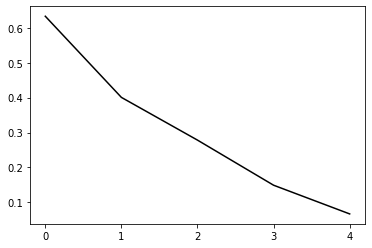

In [14]:
components = range(n_components+1)

plt.plot(components, RMSE, c='k')
plt.xticks(components)
plt.show()

In [15]:
df['rmse_shifted']=df['rmse'].shift(1)
df['gradient']=df['rmse']-df['rmse_shifted']

df.dropna(inplace=True)
df

,rmse,rmse_shifted,gradient
n_components,,,
1,0.400775,0.633339,-0.232563
2,0.278317,0.400775,-0.122459
3,0.149053,0.278317,-0.129264
4,0.066768,0.149053,-0.082285


In [16]:
df[abs(df['gradient'])==max(abs(df['gradient']))]

,rmse,rmse_shifted,gradient
n_components,,,
1,0.400775,0.633339,-0.232563
